In [2]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_UNSW_NB15_1 import Dataset_UNSW_NB15_1
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_NID import Dataset_IoT_NID
from experiment import Experiment
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)   


X_ohe shape is: 152
X_num shape is: 39
Fit time: 27.2872
Evaluate time: 0.1434
Accuracy: 0.5410
F1: 0.3805


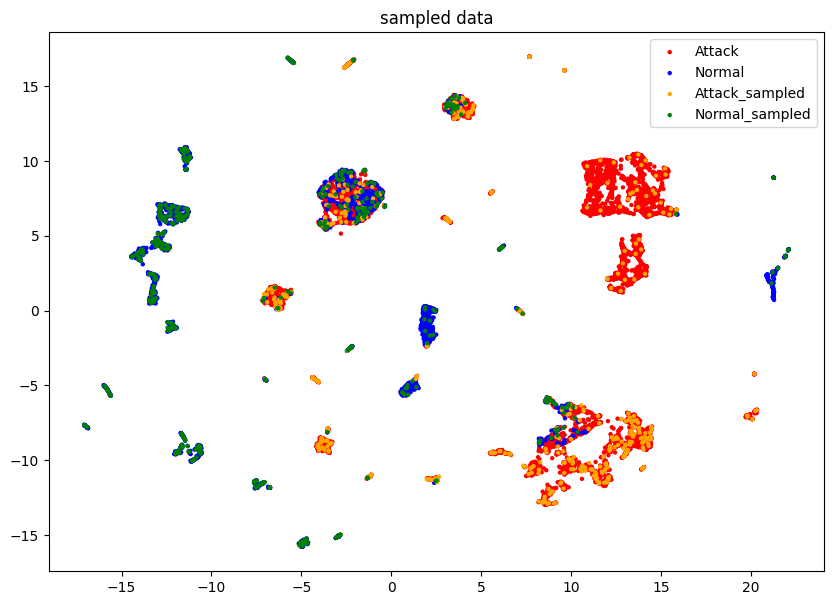

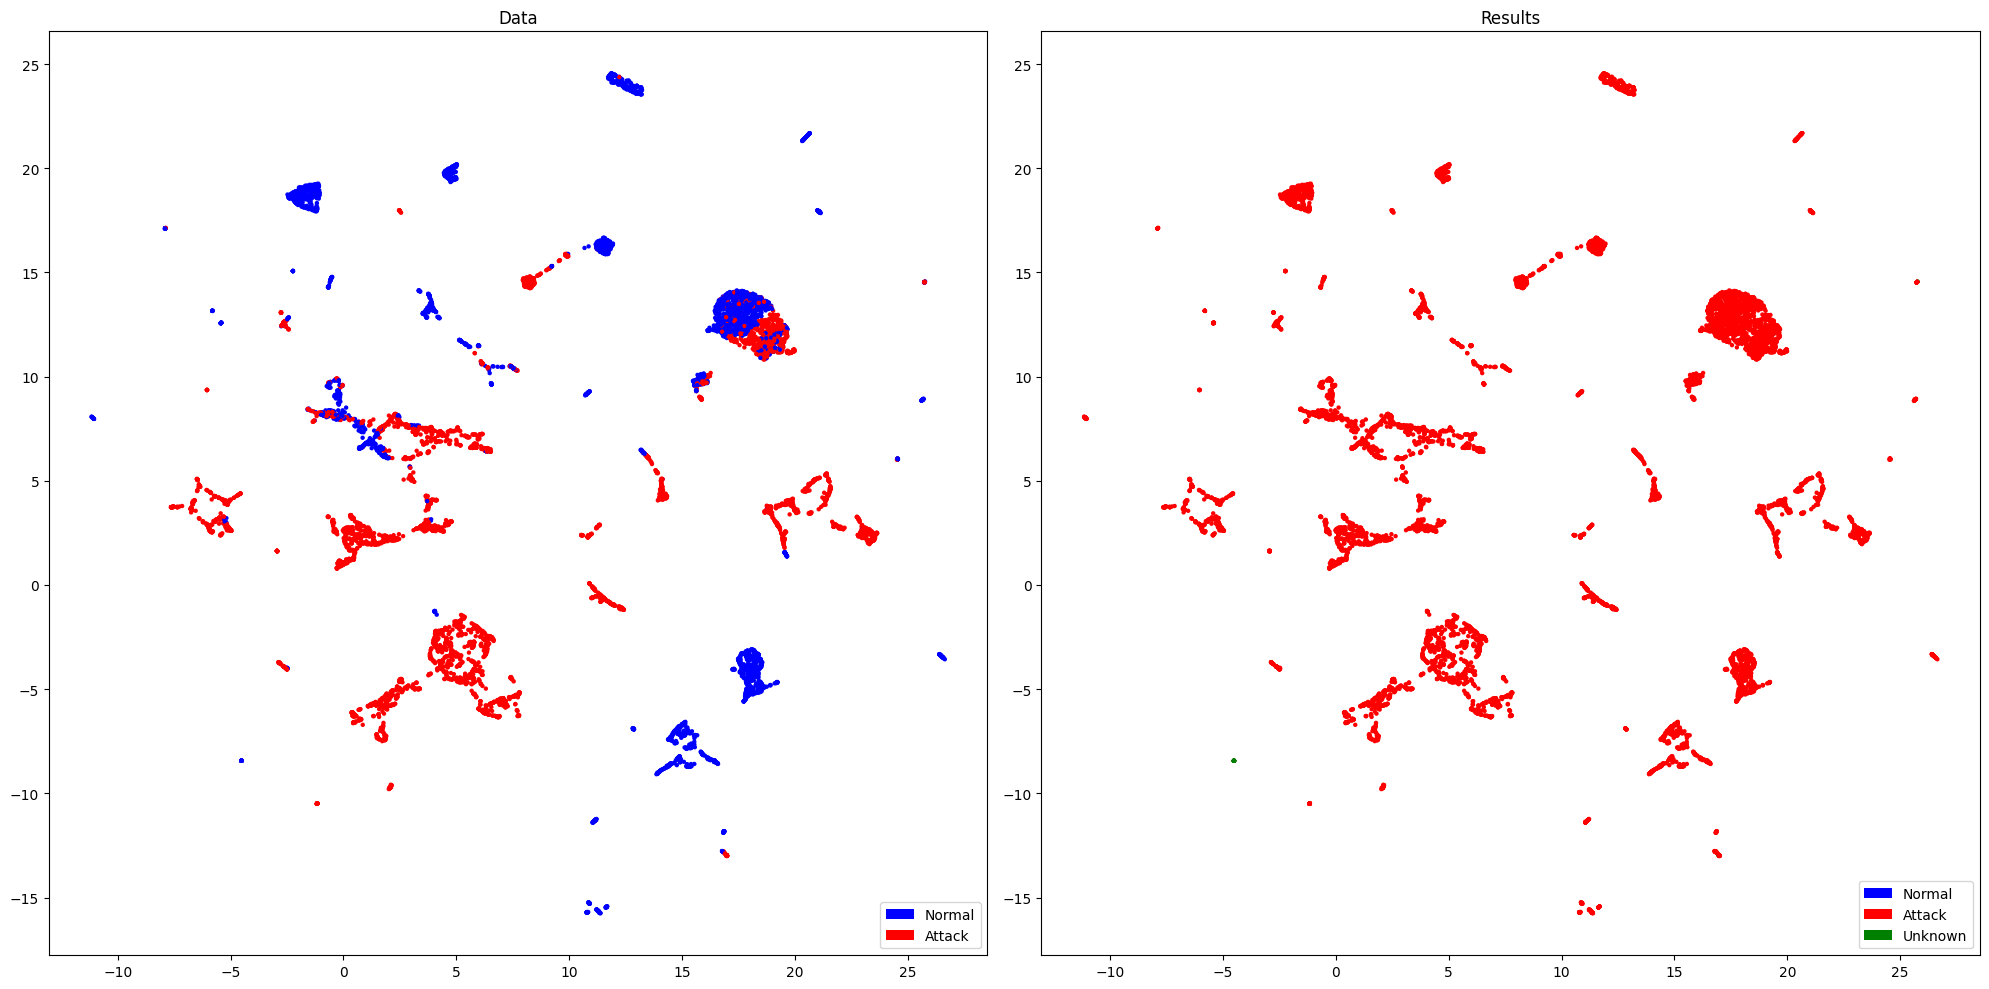

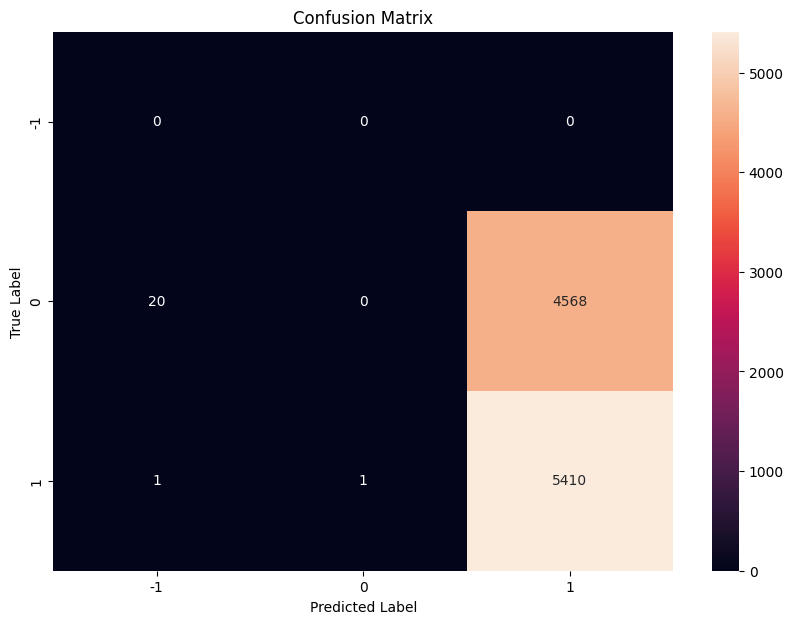

Fit time: 12.3354
Evaluate time: 0.1001
Accuracy: 0.4698
F1: 0.4214


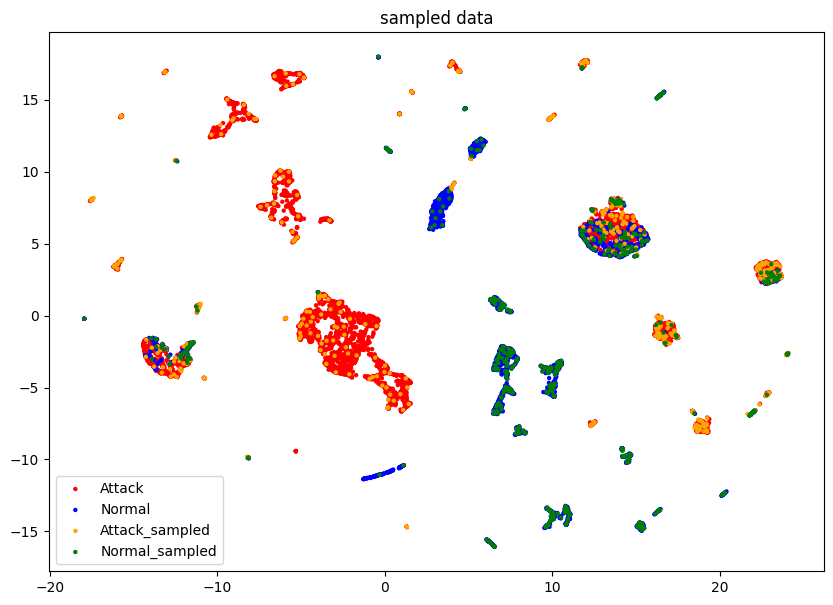

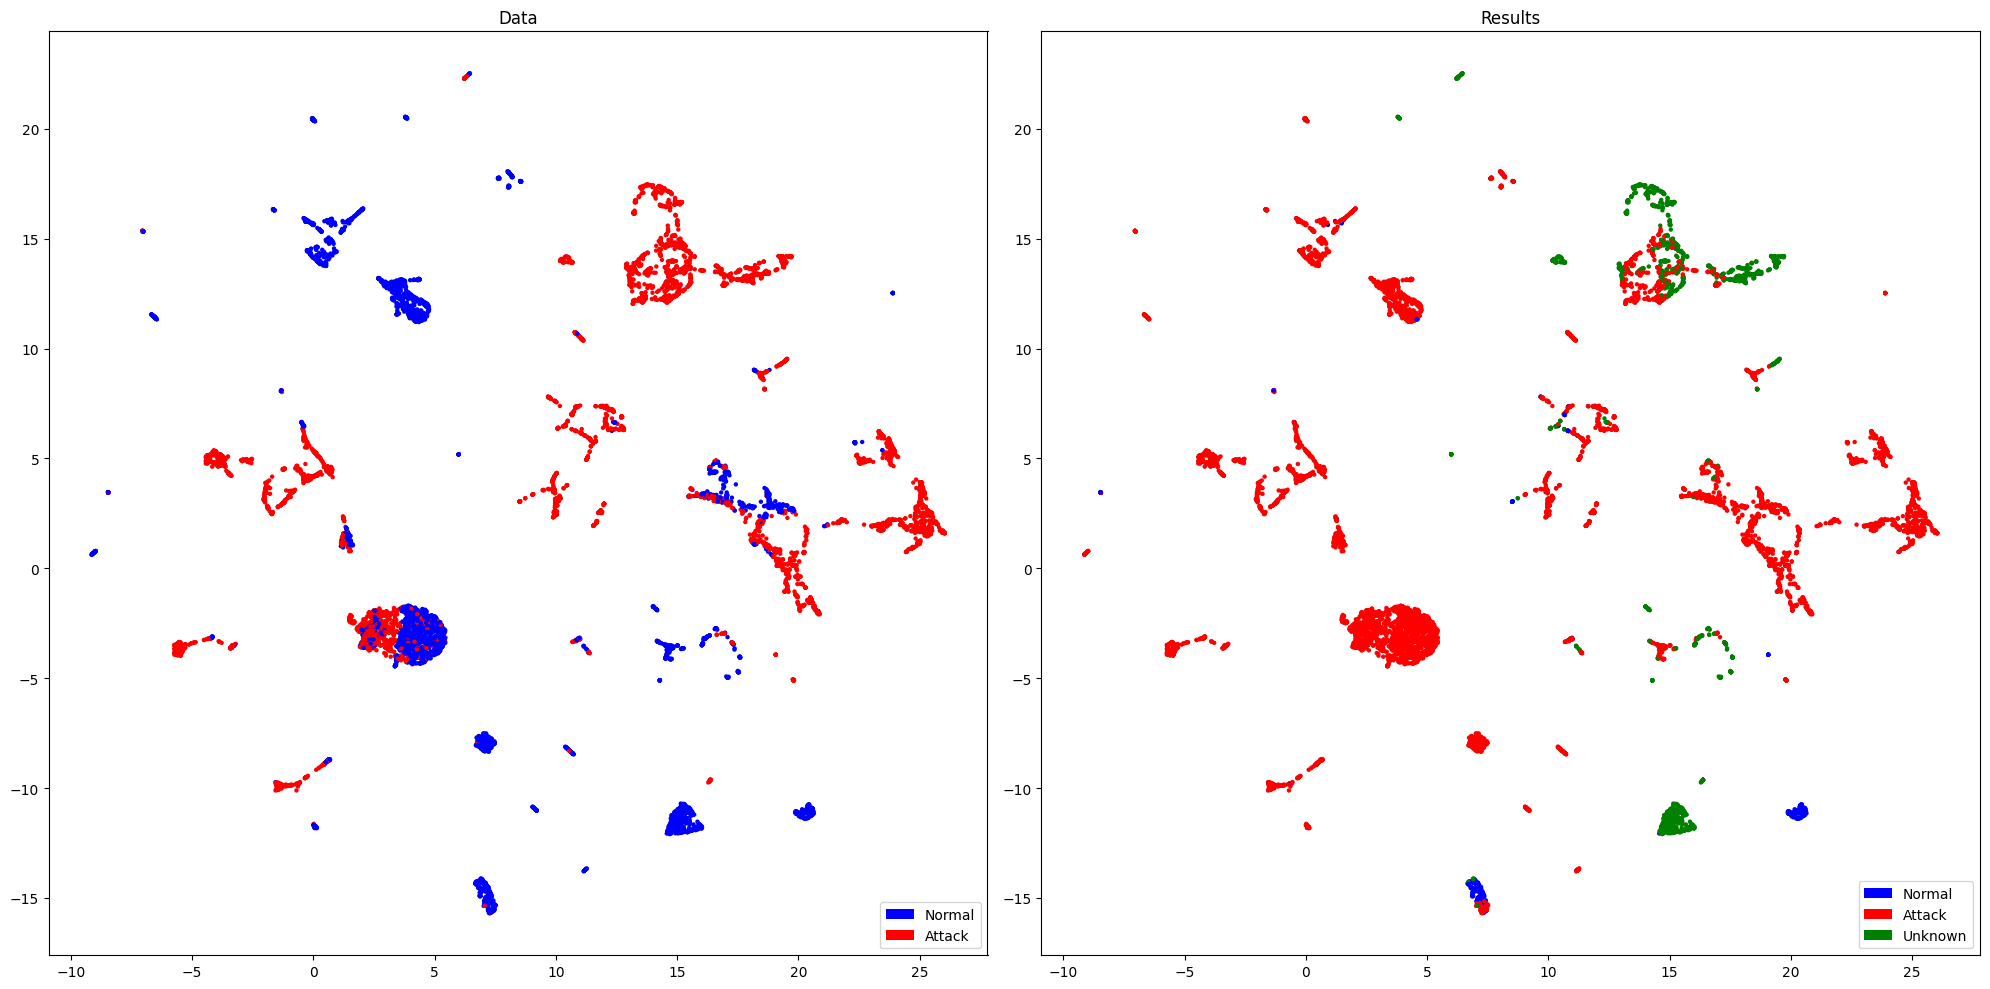

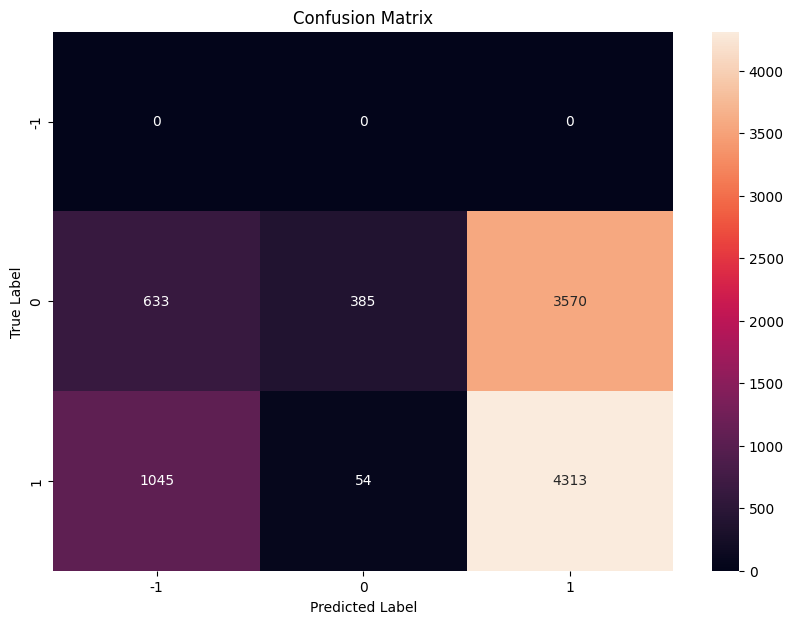

X_ohe shape is: 152
X_num shape is: 39


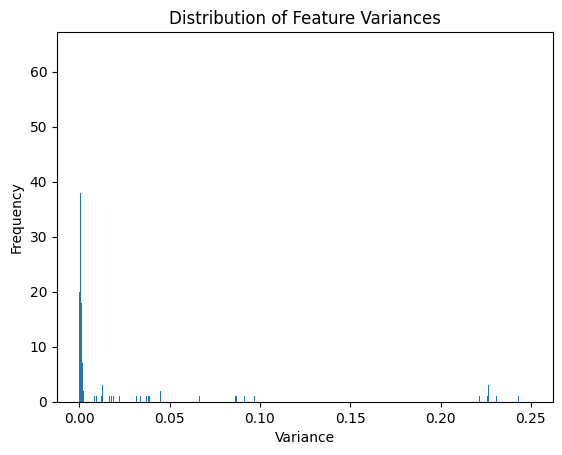

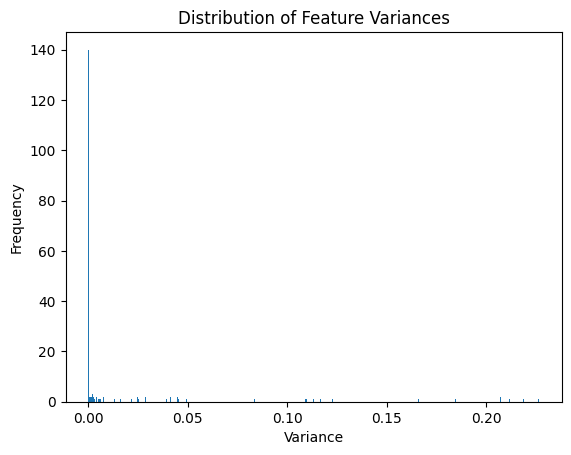

Fit time: 13.9210
Evaluate time: 0.1161
Accuracy: 0.3433
F1: 0.3142


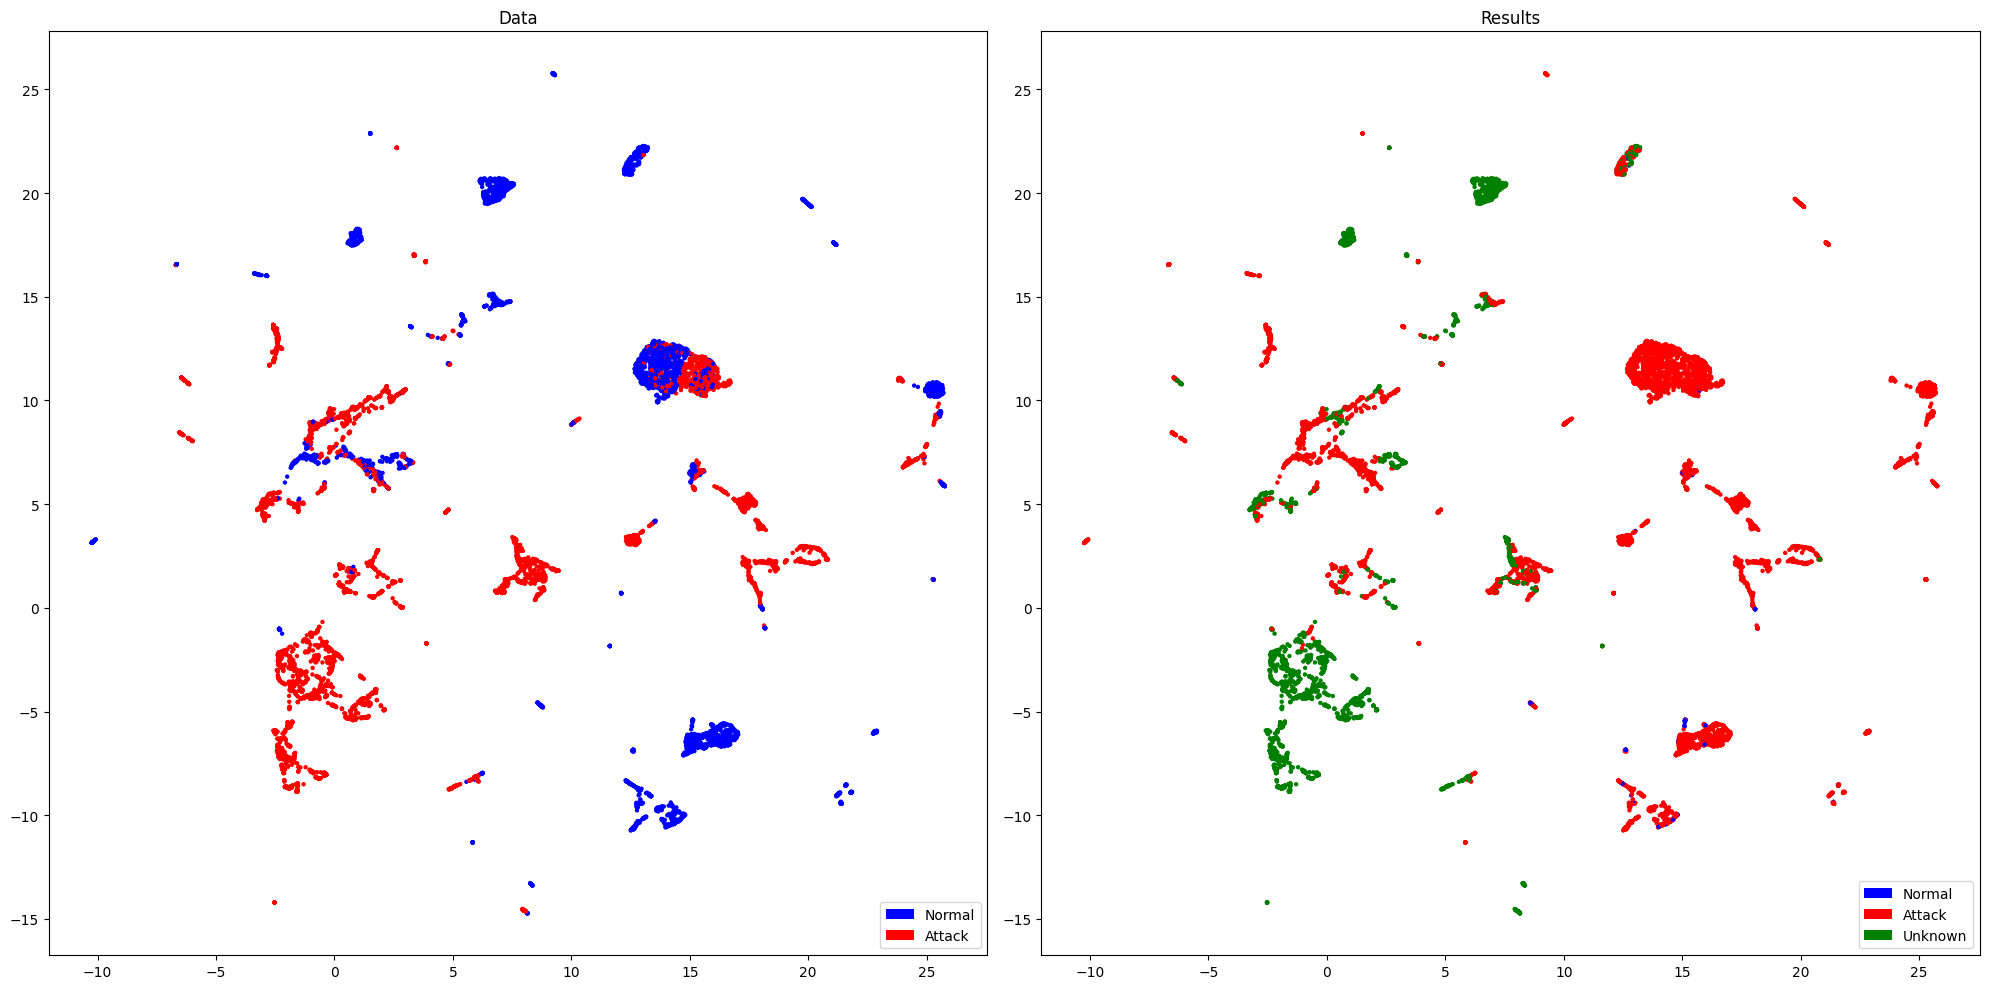

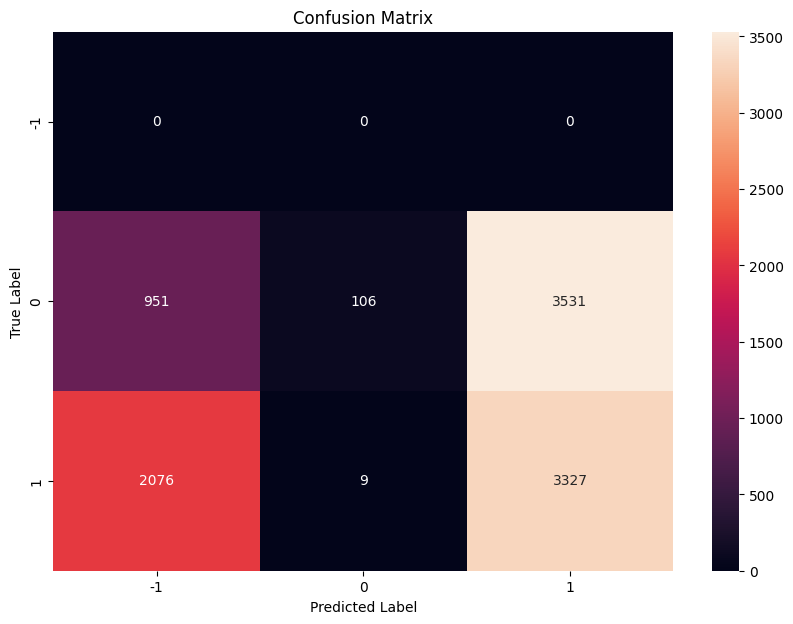

In [4]:
dataset = Dataset_UNSW_NB15(10000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=500)
exp.run_hybrid(k=500, n_fi=20, n_pca=20)
exp.run_var(k=500)

X_ohe shape is: 84
X_num shape is: 35
Fit time: 21.3528
Evaluate time: 0.0370
Accuracy: 0.5587
F1: 0.4005


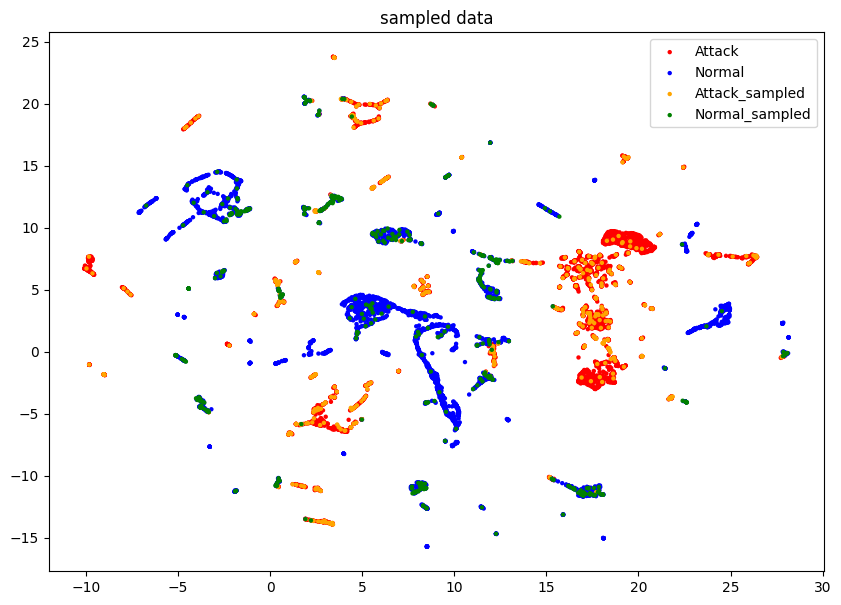

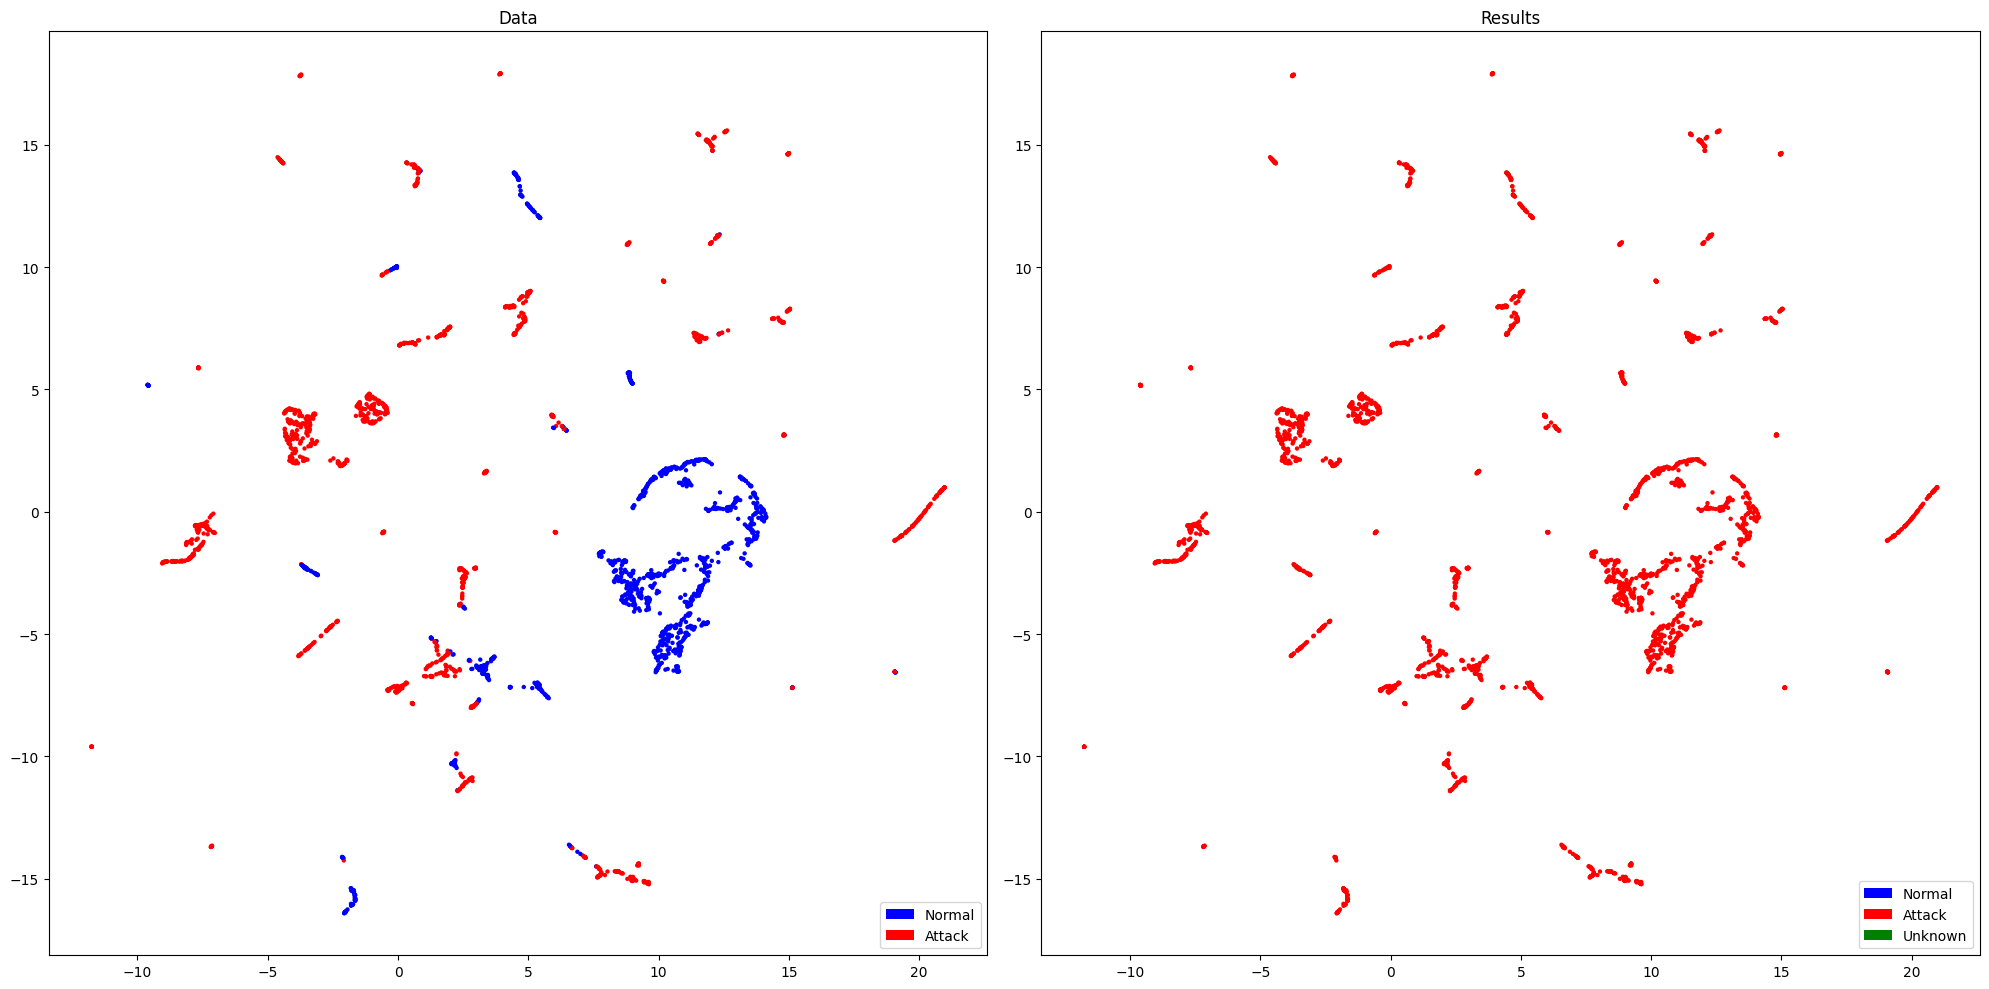

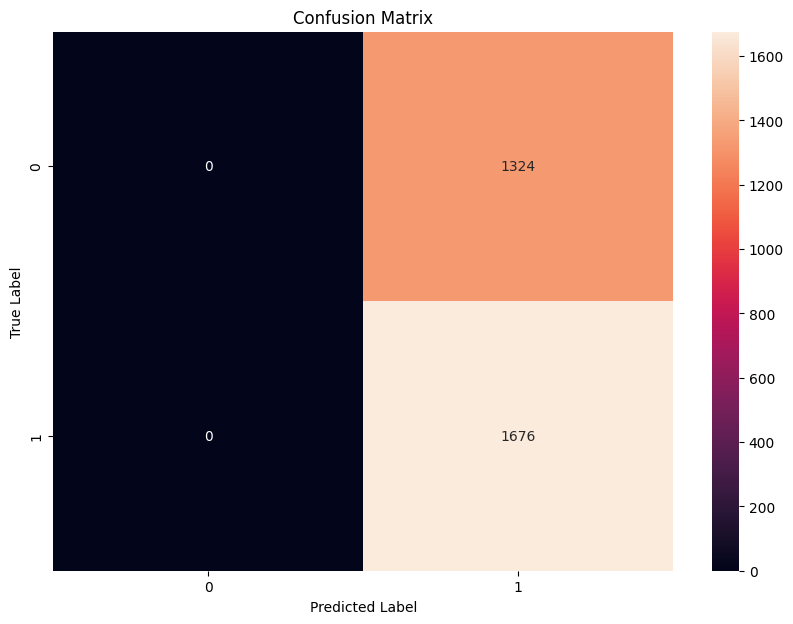

Fit time: 9.5889
Evaluate time: 0.0402
Accuracy: 0.7073
F1: 0.7559


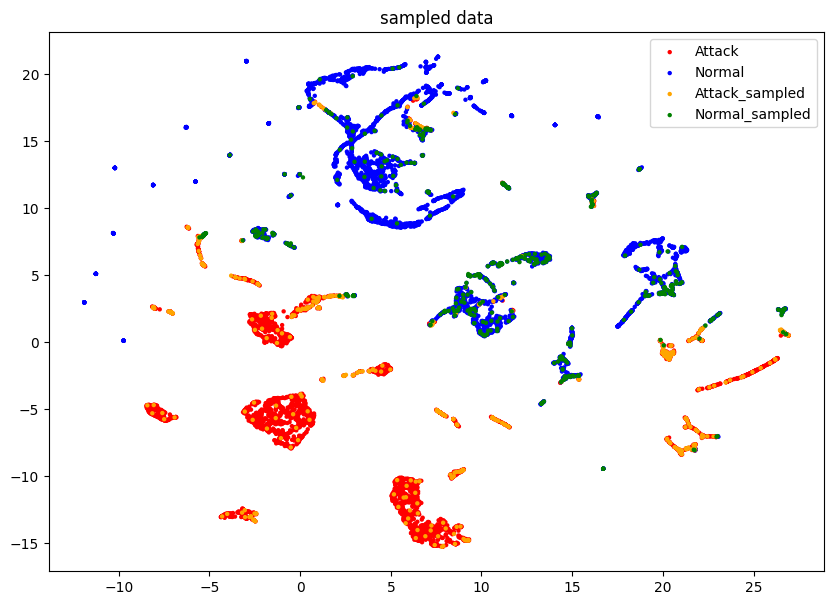

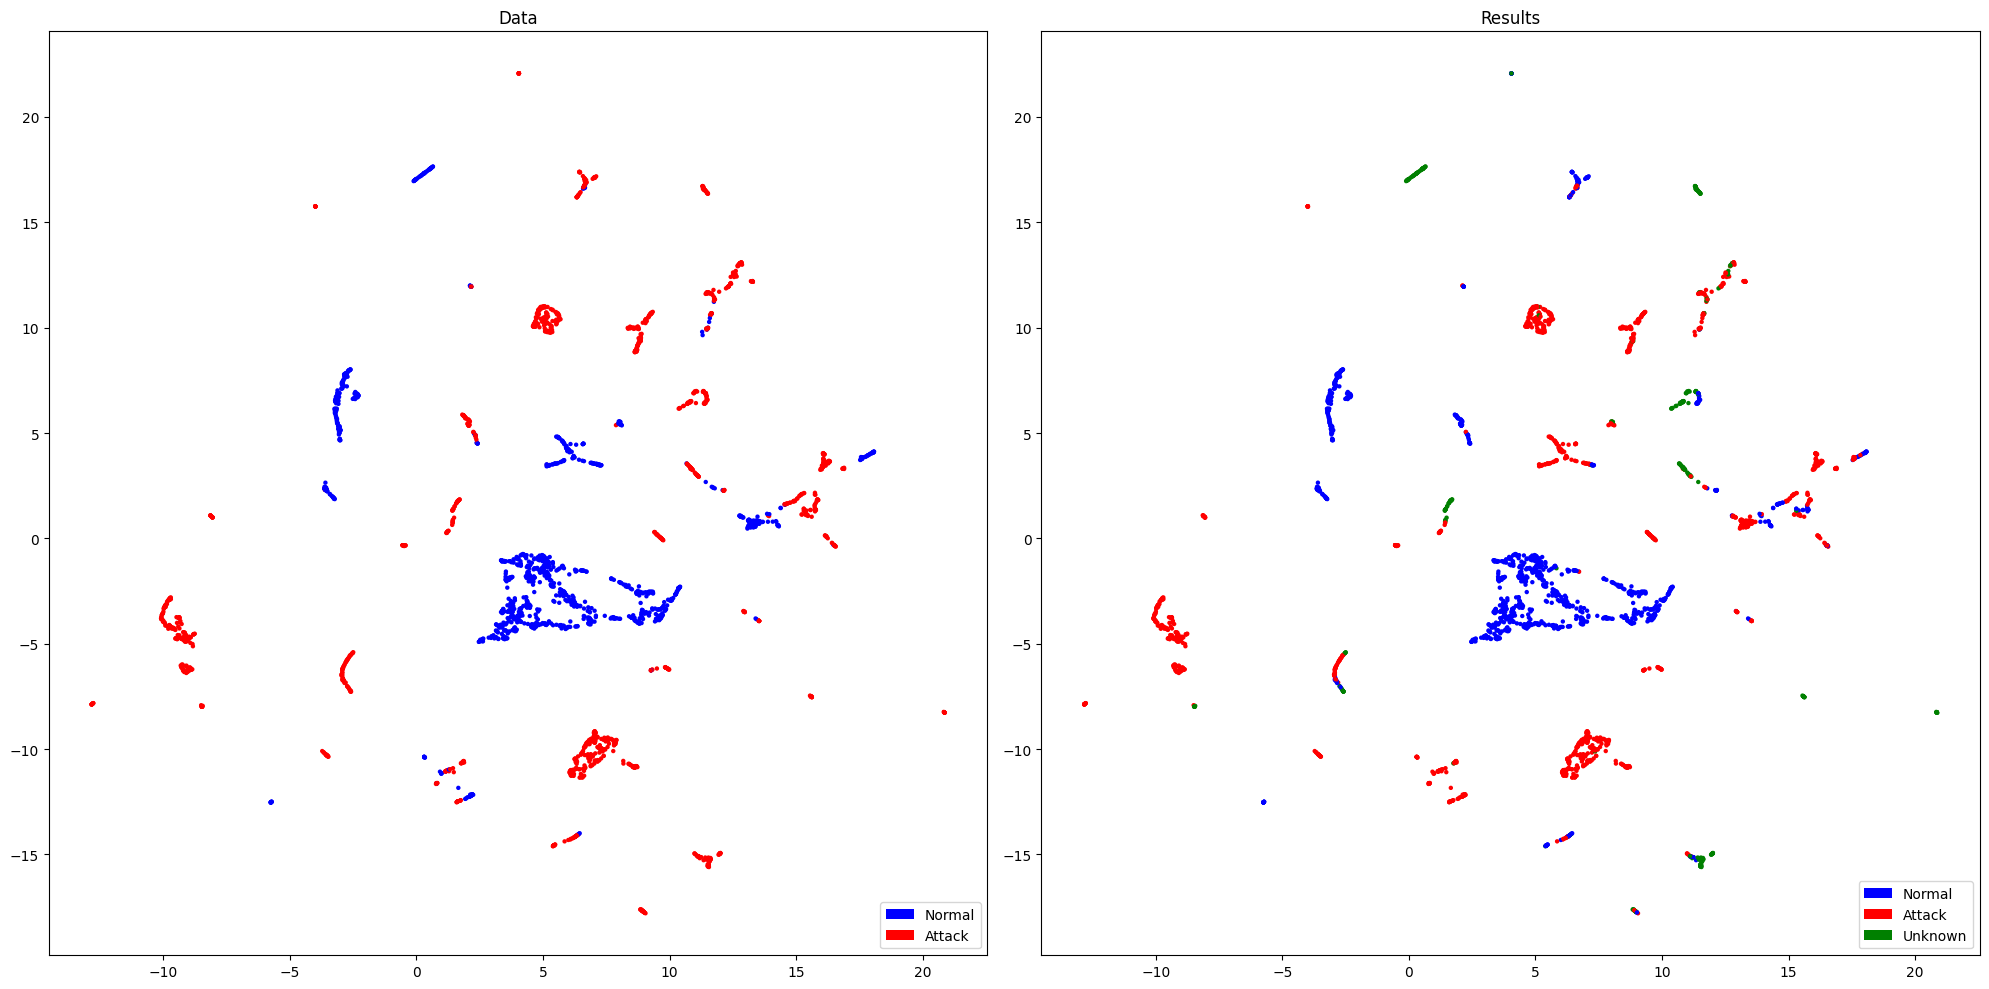

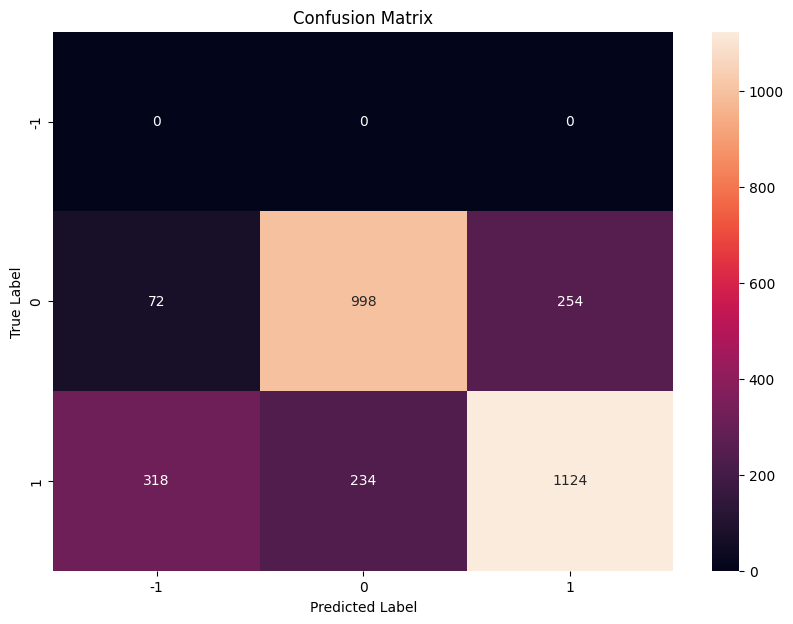

X_ohe shape is: 84
X_num shape is: 35


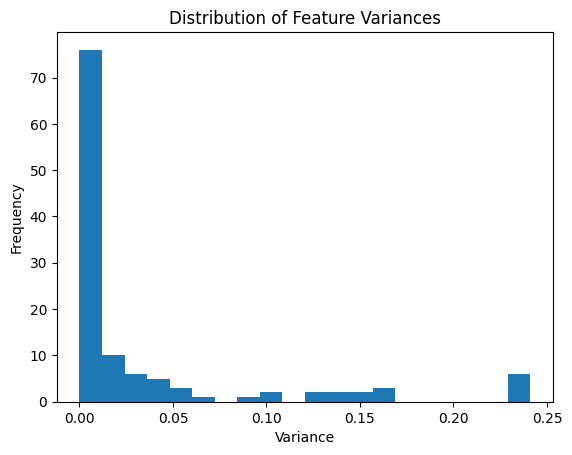

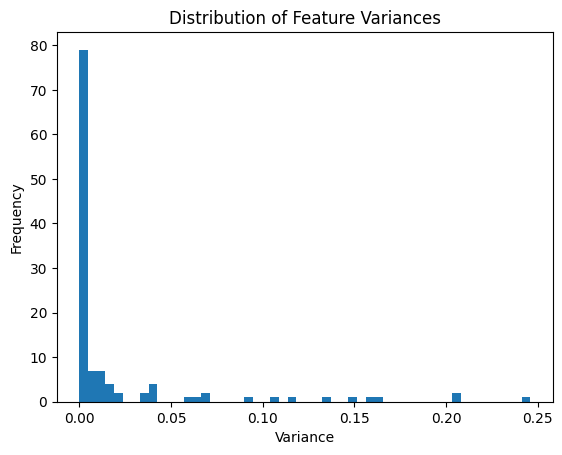

Fit time: 14.0492
Evaluate time: 0.0355
Accuracy: 0.5040
F1: 0.3820


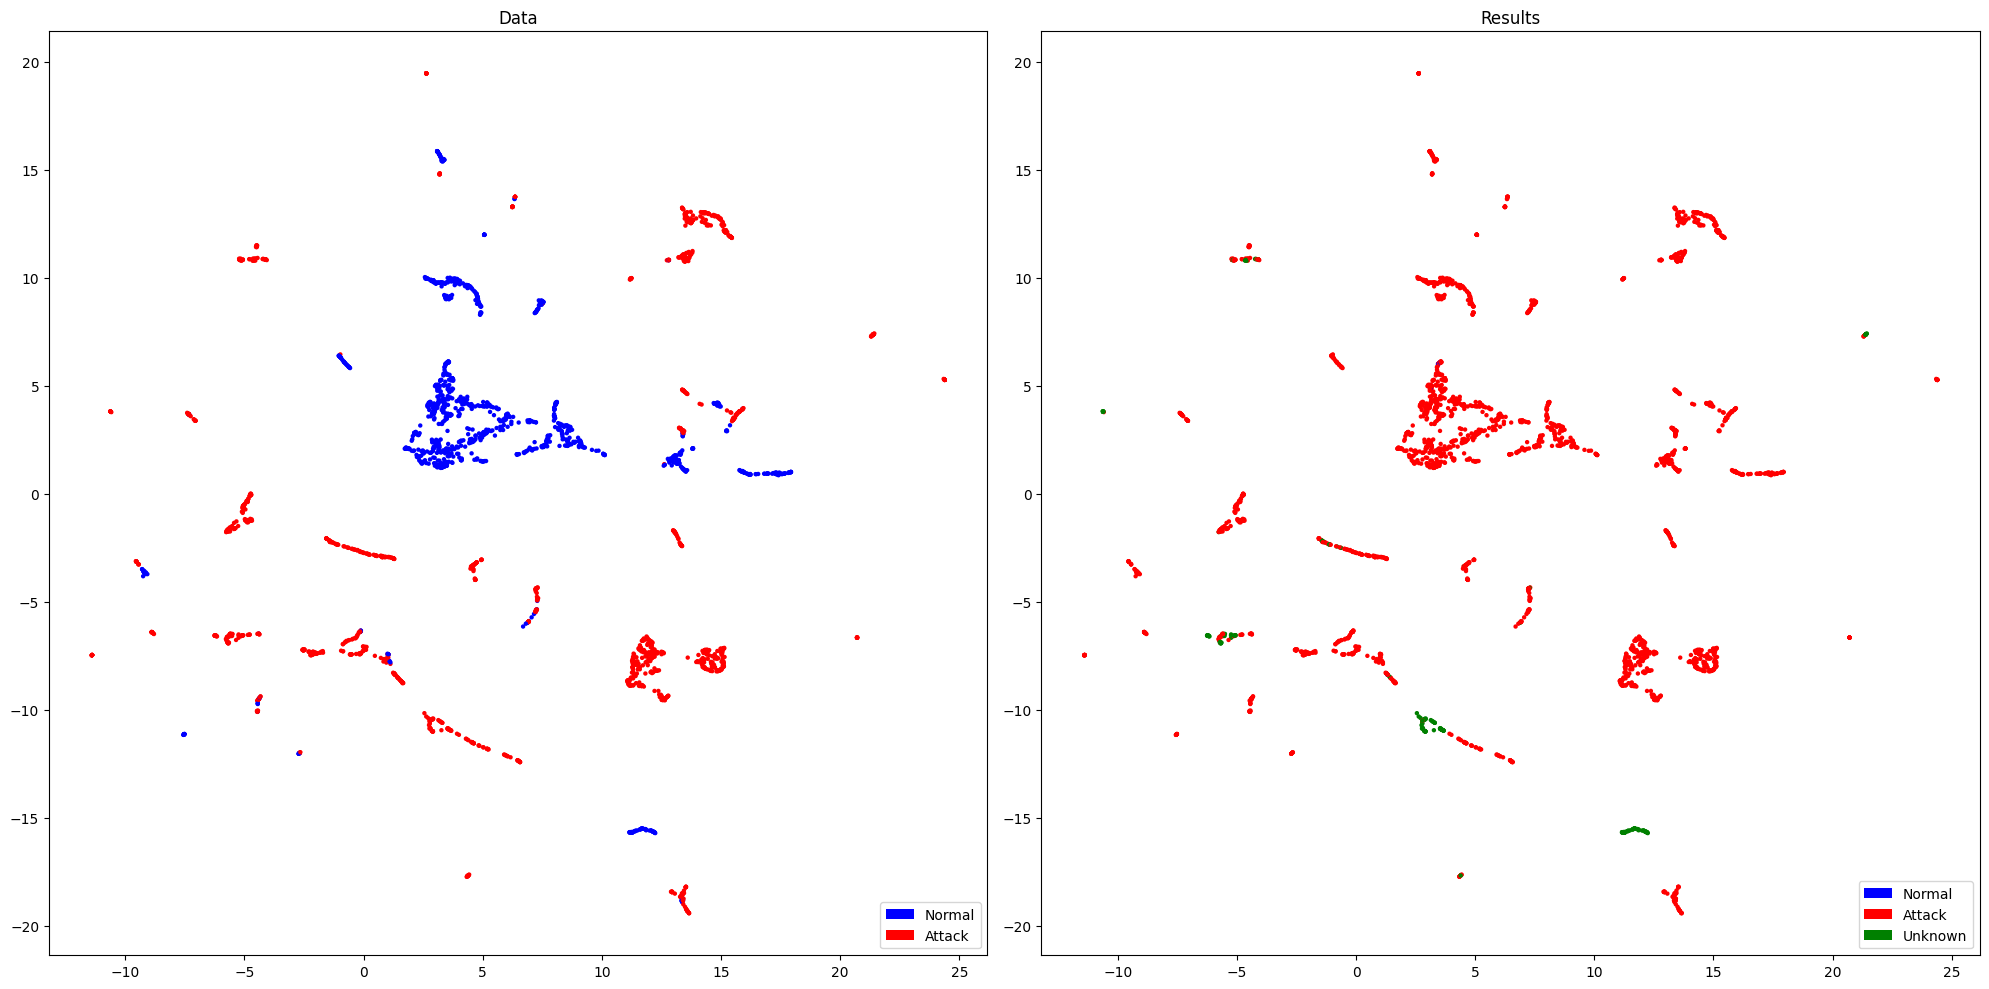

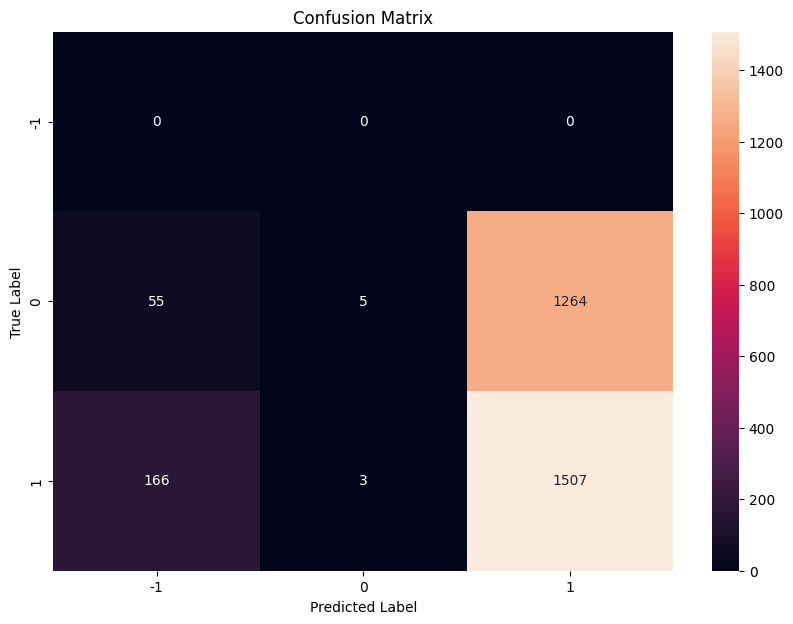

In [3]:
dataset = Dataset_NSL_KDD(10000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=500)
exp.run_hybrid(k=500, n_fi=10, n_pca=10)
exp.run_var(k=500)

In [ ]:
dataset = Dataset_IoT_NID(10000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=500)